In [10]:
import gsw
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mocsy import mocsy

In [2]:
today = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/31oct22/SalishSea_1d_20221031_20221031_carp_T.nc')
temps = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/31oct22/SalishSea_1d_20221031_20221031_grid_T.nc')

In [34]:
ii, ij = 250, 350
ji, jj = 150, 300

In [75]:
Tinsitu = np.array(gsw.t_from_CT(temps.vosaline[0, 0, ii:ij, ji:jj], temps.votemper[0, 0,  ii:ij, ji:jj], 0))

In [51]:
Spsu = 35/35.16504 * np.array(temps.vosaline[0, 0,  ii:ij, ji:jj])

In [52]:
TA = np.array(today.total_alkalinity[0, 0,  ii:ij, ji:jj])/1000.
DIC = np.array(today.dissolved_inorganic_carbon[0, 0,  ii:ij, ji:jj])/1000.

In [53]:
ones = np.ones_like(Spsu.flatten())

In [54]:
response_tup = mocsy.mvars(temp=Tinsitu.flatten(), sal=Spsu.flatten(), alk=TA.flatten(), 
                           dic=DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

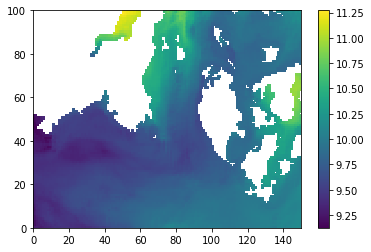

In [76]:
#plt.plot(Tis, 'x')
#plt.plot(pH, 'o')
#plt.plot(OmegaA, 'P')
#plt.plot(co2, 'o')
mymask = Tinsitu == Tinsitu[-1, 0];
ma = np.ma.array(Tinsitu, mask=mymask)
plt.pcolormesh(ma);
plt.colorbar();

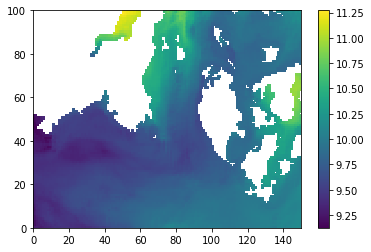

In [71]:
mymask = Tis.reshape([ij-ii, jj-ji]) > 100;
ma = np.ma.array(Tis.reshape([ij-ii, jj-ji]), mask=mymask)
plt.pcolormesh(ma);
plt.colorbar();

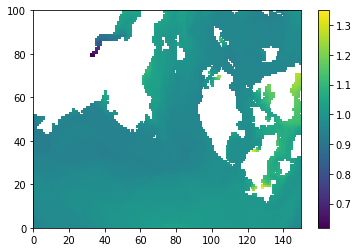

In [77]:
mymask = OmegaA.reshape([ij-ii, jj-ji]) > 100;
ma = np.ma.array(OmegaA.reshape([ij-ii, jj-ji]), mask=mymask)
plt.pcolormesh(ma);
plt.colorbar();

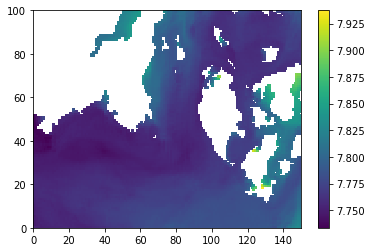

In [78]:
mymask = pH.reshape([ij-ii, jj-ji]) > 100;
ma = np.ma.array(pH.reshape([ij-ii, jj-ji]), mask=mymask)
plt.pcolormesh(ma);
plt.colorbar();